In [12]:
'''
本文主要讨论了如何处理顺序数据，以及各种不同类型的序列任务。在处理顺序数据时，我们需要考虑数据的顺序性，因为这些数据通常是按照一定的顺序产生的，例如，文档可以表示为单词序列，医疗记录可以表示为事件序列，视频可以表示为图像序列等。

在进行序列建模时，我们通常假设整个序列（例如整个文档或病人的医疗记录）是独立采样的，但我们不能假设每个时间步的数据是独立的。例如，文档中后面出现的单词往往依赖于前面出现的单词，病人在医院停留的第10天可能需要的药物很大程度上取决于前9天的情况。

序列任务的类型很多，可以根据输入和输出的结构进行分类。有时，我们希望预测一个固定的目标，给定顺序结构的输入（例如，基于电影评论的情感分类）；有时，我们希望预测一个顺序结构的目标，给定一个固定的输入（例如，图像字幕）；还有时候，我们的目标是预测顺序结构的目标，基于顺序结构的输入（例如，机器翻译或视频字幕）。这些序列到序列的任务有两种形式：对齐的，其中每个时间步的输入对应一个目标（例如，词性标注）；不对齐的，其中输入和目标并不一定有逐步对应的关系（例如，机器翻译）。

在处理任何类型的目标之前，我们可以解决最直接的问题：无监督的密度建模（也称为序列建模）。在这里，给定一组序列，我们的目标是估计概率质量函数，告诉我们看到任何给定序列的可能性有多大，即P(x)。
''' 

'\n本文主要讨论了如何处理顺序数据，以及各种不同类型的序列任务。在处理顺序数据时，我们需要考虑数据的顺序性，因为这些数据通常是按照一定的顺序产生的，例如，文档可以表示为单词序列，医疗记录可以表示为事件序列，视频可以表示为图像序列等。\n\n在进行序列建模时，我们通常假设整个序列（例如整个文档或病人的医疗记录）是独立采样的，但我们不能假设每个时间步的数据是独立的。例如，文档中后面出现的单词往往依赖于前面出现的单词，病人在医院停留的第10天可能需要的药物很大程度上取决于前9天的情况。\n\n序列任务的类型很多，可以根据输入和输出的结构进行分类。有时，我们希望预测一个固定的目标，给定顺序结构的输入（例如，基于电影评论的情感分类）；有时，我们希望预测一个顺序结构的目标，给定一个固定的输入（例如，图像字幕）；还有时候，我们的目标是预测顺序结构的目标，基于顺序结构的输入（例如，机器翻译或视频字幕）。这些序列到序列的任务有两种形式：对齐的，其中每个时间步的输入对应一个目标（例如，词性标注）；不对齐的，其中输入和目标并不一定有逐步对应的关系（例如，机器翻译）。\n\n在处理任何类型的目标之前，我们可以解决最直接的问题：无监督的密度建模（也称为序列建模）。在这里，给定一组序列，我们的目标是估计概率质量函数，告诉我们看到任何给定序列的可能性有多大，即P(x)。\n'

In [13]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [14]:
''' 
在介绍专门用于处理顺序结构数据的神经网络之前，我们先来看一些实际的序列数据，并建立一些基本的直觉和统计工具。特别是，我们将关注FTSE 100指数的股票价格数据（图9.1.1）。在每个时间步t，我们观察到该时刻的指数价格p_t。

对于这类序列数据，我们通常关注以下几个方面：

1. 趋势：序列数据中长期的变化趋势。例如，股票价格可能会呈现上升或下降的趋势。

2. 季节性：序列数据中反复出现的模式，通常与一定的时间周期相关。例如，零售业的销售数据可能会在每年的特定时间（如节假日）出现高峰。

3. 噪声：序列数据中的随机波动，可能是由于观测误差、外部因素或其他难以预测的原因引起的。

为了处理这些序列数据，我们需要使用适当的模型和方法来捕捉数据中的这些特征。例如，我们可以使用时间序列分析的方法，如自回归模型（AR）、移动平均模型（MA）或自回归移动平均模型（ARMA）等，来预测未来的股票价格。这些模型通常会考虑数据中的趋势、季节性和噪声等因素，以提高预测的准确性和稳定性。

然而，在处理更复杂的序列数据时，这些传统方法可能会受到限制。这时，我们可以使用循环神经网络（RNN）等深度学习模型来处理数据中的顺序结构。RNN可以捕捉序列中的长期依赖关系和动态变化，从而更好地预测未来的股票价格或其他类型的序列数据。在后续章节中，我们将详细介绍RNN及其在处理顺序数据时的应用。
'''

' \n在介绍专门用于处理顺序结构数据的神经网络之前，我们先来看一些实际的序列数据，并建立一些基本的直觉和统计工具。特别是，我们将关注FTSE 100指数的股票价格数据（图9.1.1）。在每个时间步t，我们观察到该时刻的指数价格p_t。\n\n对于这类序列数据，我们通常关注以下几个方面：\n\n1. 趋势：序列数据中长期的变化趋势。例如，股票价格可能会呈现上升或下降的趋势。\n\n2. 季节性：序列数据中反复出现的模式，通常与一定的时间周期相关。例如，零售业的销售数据可能会在每年的特定时间（如节假日）出现高峰。\n\n3. 噪声：序列数据中的随机波动，可能是由于观测误差、外部因素或其他难以预测的原因引起的。\n\n为了处理这些序列数据，我们需要使用适当的模型和方法来捕捉数据中的这些特征。例如，我们可以使用时间序列分析的方法，如自回归模型（AR）、移动平均模型（MA）或自回归移动平均模型（ARMA）等，来预测未来的股票价格。这些模型通常会考虑数据中的趋势、季节性和噪声等因素，以提高预测的准确性和稳定性。\n\n然而，在处理更复杂的序列数据时，这些传统方法可能会受到限制。这时，我们可以使用循环神经网络（RNN）等深度学习模型来处理数据中的顺序结构。RNN可以捕捉序列中的长期依赖关系和动态变化，从而更好地预测未来的股票价格或其他类型的序列数据。在后续章节中，我们将详细介绍RNN及其在处理顺序数据时的应用。\n'

自回归模型（AutoRegressive model，简称AR）是一种时间序列模型，它使用观测序列的先前值来预测当前值。AR模型的基本思想是假设当前时间点的值是前k个时间点值的线性组合，加上一个随机误差项。AR模型的一般形式如下：

y_t = c + φ1 * y_(t-1) + φ2 * y_(t-2) + ... + φk * y_(t-k) + ε_t

其中，y_t是当前时间点的值，c是常数项，φ1、φ2、...、φk是自回归系数，k是模型的阶数，ε_t是随机误差项。

常见的自回归模型有：

1. AR(1)模型：一阶自回归模型，只使用序列的前一个值进行预测。
2. AR(2)模型：二阶自回归模型，使用序列的前两个值进行预测。
3. AR(k)模型：k阶自回归模型，使用序列的前k个值进行预测。

以下是一个使用Python和statsmodels库拟合AR模型的示例：

```python
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# 生成模拟数据
np.random.seed(0)
n = 100
epsilon = np.random.normal(loc=0, scale=1, size=n)
y = np.zeros(n)
for i in range(1, n):
    y[i] = 0.8 * y[i-1] + epsilon[i]

# 拟合AR(1)模型
model = AutoReg(y, lags=1)
result = model.fit()

# 输出模型参数
print(result.summary())

# 预测
start = n
end = n + 5
forecast = result.predict(start=start, end=end)
print("Forecast:", forecast)
```

在这个示例中，我们首先生成了一个模拟的时间序列数据，然后使用statsmodels库中的AutoReg类拟合了一个AR(1)模型。最后，我们输出了模型的参数，并进行了预测。

本文主要讨论了如何处理变长的序列数据和自回归模型的一些策略。在预测未来的股票价格或其他类型的序列数据时，我们通常需要考虑历史数据。然而，历史数据的长度可能会随时间变化，这导致了每个样本具有不同数量的特征的问题。为了解决这个问题，我们可以采用以下几种策略：

1. 使用固定窗口长度：尽管有长序列的历史数据可用，但在预测近期的未来时，可能不需要回顾太久的历史。在这种情况下，我们可以选择一个窗口长度τ，只使用最近τ个观察值。这样，输入的数量始终是相同的，至少对于t > τ。这允许我们训练任何需要固定长度向量作为输入的线性模型或深度网络。

2. 开发维护过去观察值概要的模型：我们可以开发一些模型，这些模型维护过去观察值的某种概要s_t，并同时更新s_t以及预测y_t。这导致了不仅估计y_t与s_t的模型，而且还有形式为s_t = f(s_(t-1), y_(t-1))的更新。因为s_t从未被观察到，所以这些模型也被称为潜在自回归模型。

这些策略为我们处理变长序列数据和自回归模型提供了有效的方法。在后续章节中，我们将详细介绍如何使用这些策略和深度学习模型来处理更复杂的序列数据和预测问题。

![](https://d2l.ai/_images/sequence-model.svg)

为了从历史数据中构建训练数据，人们通常通过随机采样窗口来创建样本。通常，我们不期望时间静止不变。然而，我们经常假设，尽管y_t的具体值可能会发生变化，但是根据先前观察结果生成每个后续观察结果的动态不会发生变化。统计学家称这种不变的动态为平稳性。

平稳性是时间序列分析中的一个重要概念。一个平稳时间序列具有恒定的均值、恒定的方差和与时间无关的自相关性。换句话说，平稳时间序列的统计特性不会随时间而改变。处理平稳时间序列的好处是，我们可以更容易地建立和训练模型，因为模型不需要考虑潜在动态的变化。

然而，并非所有的时间序列数据都是平稳的。在这种情况下，我们需要对数据进行预处理，以使其变得平稳。以下是一些建立平稳时间序列的方法：

1. 差分：对原始序列进行一阶差分（或更高阶差分），以消除趋势和季节性成分。差分序列的值是原始序列相邻值之间的差异。

2. 对数变换：对原始序列进行对数变换，以减小数据的波动幅度和稳定方差。

3. 移动平均：计算原始序列的移动平均，以消除短期波动和噪声。

在对数据进行预处理后，我们可以使用自回归模型或其他时间序列模型来分析和预测平稳时间序列。这将有助于提高模型的准确性和稳定性。

#### Sequence Models
有时，尤其是在处理语言时，我们希望估计整个序列的联合概率。这是处理由离散符号（如单词）组成的序列的常见任务。通常，这些估计函数被称为序列模型，对于自然语言数据，它们被称为语言模型。序列建模领域在很大程度上受到自然语言处理的推动，因此我们通常将序列模型描述为“语言模型”，即使在处理非语言数据时也是如此。语言模型在各种原因下都很有用。有时我们想要评估句子的可能性。例如，我们可能希望比较由机器翻译系统或语音识别系统生成的两个候选输出的自然程度。但是，语言建模不仅可以评估可能性，还可以对序列进行采样，甚至可以优化最可能的序列。

虽然语言建模乍一看可能不像一个自回归问题，但我们可以通过将序列x的联合密度分解为条件密度的乘积，从左到右应用概率链规则来将语言建模简化为自回归预测：

P(x) = P(x1,...,xT) = ∏(P(x_t|x_1,...,x_(t-1)))

请注意，如果我们处理离散信号（如单词），那么自回归模型必须是概率分类器，根据左侧上下文输出词汇表上下一个单词的完整概率分布。

通过使用循环神经网络（RNN）或其他深度学习模型，我们可以有效地处理这种自回归问题。RNN可以捕获序列中的长期依赖关系和动态变化，从而更好地预测给定上下文的下一个单词或其他类型的序列数据。在后续章节中，我们将详细介绍如何使用RNN和其他模型处理自回归预测和语言建模问题。

#### Markov Model
假设我们希望采用上述策略，即只根据前τ个时间步，即x_(t-τ),...,x_(t-1)，而不是整个序列历史x_1,...,x_(t-1)。当我们可以在不损失预测能力的情况下丢弃之前的τ步历史时，我们说序列满足马尔可夫条件，即在给定最近历史的情况下，未来与过去相互独立。当τ=1时，我们说数据由一阶马尔可夫模型描述；当τ>1时，我们说数据由τ阶马尔可夫模型描述。当满足一阶马尔可夫条件时（τ=1），我们的联合概率分解变为每个单词在前一个单词的条件下的概率乘积：

P(x) = P(x1,...,xT) = ∏(P(x_t|x_(t-1)))

我们通常发现，即使我们知道马尔可夫条件只是近似成立，使用依赖于τ阶马尔可夫条件的模型也是有用的。对于真实文本文档，随着包含越来越多的左侧上下文，我们继续获得信息。但这些收益迅速减少。因此，有时我们会妥协，在计算和统计困难的情况下训练依赖于τ阶马尔可夫条件的模型。即使是现今基于RNN和Transformer的大型语言模型，也很少包含超过数千个单词的上下文。

对于离散数据，真正的马尔可夫模型只需计算每个单词在每个上下文中出现的次数，从而得到P(x_t|x_(t-1))的相对频率估计。当数据只取离散值时（如在语言中），可以使用动态规划高效地计算最可能的单词序列。

你可能会想知道为什么我们将文本序列x的分解表示为从左到右的条件概率链。为什么不是从右到左或其他看似随机的顺序呢？原则上，按相反的顺序展开x并没有什么问题。结果是一个有效的分解：

P(x) = P(x1,...,xT) = ∏(P(x_t|x_(t+1),...,xT))

然而，有很多原因使得在语言建模任务中，我们更倾向于按照我们阅读的同一方向（对于大多数语言是从左到右，但对于阿拉伯语和希伯来语是从右到左）来分解文本。首先，这是我们思考的更自然的方向。毕竟我们每天都在阅读文本，这个过程是由我们预测接下来可能出现的单词和短语的能力引导的。只要想想你有多少次完成了别人的句子。因此，即使我们没有其他理由更喜欢这样的顺序解码，它们也是有用的，因为我们对预测这个顺序的可能性有更好的直觉。

其次，通过顺序分解，我们可以使用相同的语言模型为任意长的序列分配概率。为了将步骤t到T的概率转换为扩展到单词x_(T+1)的概率，我们只需乘以给定前面的标记的额外标记的条件概率：P(x_(T+1)|x1,...,xT)。

第三，我们对预测相邻单词的预测模型比对预测任意其他位置的单词的预测模型更强。虽然所有的分解顺序都是有效的，但它们并不一定都代表同样容易的预测建模问题。这不仅对语言是真实的，对其他类型的数据也是如此，例如，当数据是因果结构的。例如，我们认为未来的事件不能影响过去。因此，如果我们改变x_t，我们可能能够影响向前的x_(t+1)，但反过来不是。也就是说，如果我们改变x_t，过去事件的分布不会改变。在某些情况下，这使得预测x_(t+1)比预测x_t更容易。例如，在某些情况下，我们可以找到x_t = f(x_(t-1)) + ε，而反过来却不是这样（Hoyer等人，2009）。这是个好消息，因为我们通常对估计向前的方向更感兴趣。Peters等人（2017）的书中对这个话题有更多的内容。我们只是简单地介绍了一下。

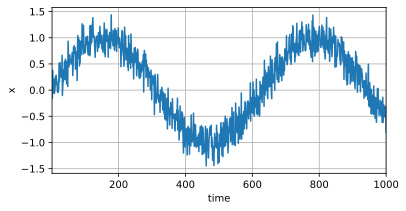

In [15]:
class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2
        #self.x = torch.sin(0.01 * self.time)



data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [21]:
print(data.tau)

4


In [22]:
@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i: self.T-self.tau+i] for i in range(self.tau)]
    self.features = torch.stack(features, 1)
    self.labels = self.x[self.tau:].reshape((-1, 1))
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    print(self.features, self.labels)
    return self.get_tensorloader([self.features, self.labels], train, i)
''' 
这段代码定义了一个名为`get_dataloader`的方法，并将其添加到`Data`类中。这个方法的目的是根据给定的时间序列数据生成训练和测试数据加载器。以下是代码中各部分的详细解释：

1. `@d2l.add_to_class(Data)`装饰器将`get_dataloader`方法添加到`Data`类中。

2. `get_dataloader`方法接受一个名为`train`的参数，表示是否生成训练数据加载器（如果为`True`）或测试数据加载器（如果为`False`）。

3. 在方法中，首先使用列表推导式为每个滞后时间创建特征。`self.x[i : self.T-self.tau+i]`表示从索引`i`开始，长度为`self.T-self.tau`的子序列。将这些子序列堆叠在一起，形成一个形状为`(self.T-self.tau, self.tau)`的特征张量`self.features`。

4. 接下来，将时间序列数据`self.x`中从`self.tau`开始的部分重塑为形状为`(-1, 1)`的标签张量`self.labels`。

5. 根据`train`参数的值，使用`slice`函数选择训练数据或测试数据的索引范围。如果`train`为`True`，则选择从0到`self.num_train`的范围；如果`train`为`False`，则选择从`self.num_train`到末尾的范围。

6. 调用`self.get_tensorloader`方法，将特征和标签张量以及索引范围作为输入，返回生成的数据加载器。

总之，这段代码定义了一个方法，用于根据给定的时间序列数据生成训练和测试数据加载器。这些数据加载器可以用于训练和评估模型。
'''

' \n这段代码定义了一个名为`get_dataloader`的方法，并将其添加到`Data`类中。这个方法的目的是根据给定的时间序列数据生成训练和测试数据加载器。以下是代码中各部分的详细解释：\n\n1. `@d2l.add_to_class(Data)`装饰器将`get_dataloader`方法添加到`Data`类中。\n\n2. `get_dataloader`方法接受一个名为`train`的参数，表示是否生成训练数据加载器（如果为`True`）或测试数据加载器（如果为`False`）。\n\n3. 在方法中，首先使用列表推导式为每个滞后时间创建特征。`self.x[i : self.T-self.tau+i]`表示从索引`i`开始，长度为`self.T-self.tau`的子序列。将这些子序列堆叠在一起，形成一个形状为`(self.T-self.tau, self.tau)`的特征张量`self.features`。\n\n4. 接下来，将时间序列数据`self.x`中从`self.tau`开始的部分重塑为形状为`(-1, 1)`的标签张量`self.labels`。\n\n5. 根据`train`参数的值，使用`slice`函数选择训练数据或测试数据的索引范围。如果`train`为`True`，则选择从0到`self.num_train`的范围；如果`train`为`False`，则选择从`self.num_train`到末尾的范围。\n\n6. 调用`self.get_tensorloader`方法，将特征和标签张量以及索引范围作为输入，返回生成的数据加载器。\n\n总之，这段代码定义了一个方法，用于根据给定的时间序列数据生成训练和测试数据加载器。这些数据加载器可以用于训练和评估模型。\n'

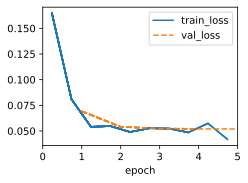

In [23]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

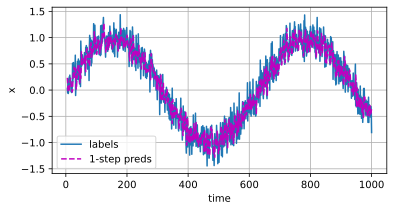

In [18]:
onestep_preds = model(data.features).detach().numpy()
d2l.plot(data.time[data.tau:], [data.labels, onestep_preds], 'time', 'x',
         legend=['labels', '1-step preds'], figsize=(6, 3))

''' 
这段代码的目的是绘制一步预测结果与实际标签值之间的对比。以下是代码中各部分的详细解释：

1. `onestep_preds = model(data.features).detach().numpy()`：这一行代码使用训练好的模型（`model`）对特征（`data.features`）进行预测。`detach()`函数将预测结果从计算图中分离出来，以便可以将其转换为NumPy数组。这样，我们就得到了一步预测结果`onestep_preds`。

2. `d2l.plot(data.time[data.tau:], [data.labels, onestep_preds], 'time', 'x', legend=['labels', '1-step preds'], figsize=(6, 3))`：这一行代码使用`d2l.plot`函数绘制实际标签值和一步预测结果的对比图。x轴表示时间（`data.time[data.tau:]`），y轴表示数据值。图例包括“labels”（实际标签值）和“1-step preds”（一步预测结果）。图表的大小设置为（6, 3）。

这里之所以称为一步预测，是因为我们使用模型对每个时间步长的特征进行预测，而这些特征仅包含从当前时间步长开始的过去τ个观测值。换句话说，我们的模型预测了在给定过去τ个观测值的情况下，下一个时间步长（即当前时间步长加1）的值。因此，这种预测被称为一步预测。
'''

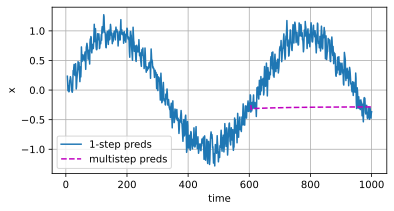

In [25]:
multistep_preds = torch.zeros(data.T)
multistep_preds[:] = data.x
for i in range(data.num_train + data.tau, data.T):
    multistep_preds[i] = model(
        multistep_preds[i - data.tau:i].reshape((1, -1)))
multistep_preds = multistep_preds.detach().numpy()

d2l.plot([data.time[data.tau:], data.time[data.num_train+data.tau:]],
         [onestep_preds, multistep_preds[data.num_train+data.tau:]], 'time',
         'x', legend=['1-step preds', 'multistep preds'], figsize=(6, 3))

torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([933, 1])
torch.Size([9

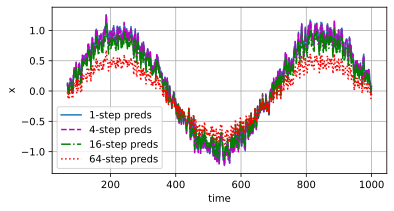

In [27]:
def k_step_pred(k):
    features = []
    for i in range(data.tau):
        features.append(data.x[i: i+data.T-data.tau-k+1])
    # The (i+tau)-th element stores the (i+1)-step-ahead predictions
    for i in range(k):
        preds = model(torch.stack(features[i: i+data.tau], 1))
        print(i, preds.shape)
        features.append(preds.reshape(-1))
    return features[data.tau:]


steps = (1, 4, 16, 64)
preds = k_step_pred(steps[-1])
d2l.plot(data.time[data.tau+steps[-1]-1:],
         [preds[k - 1].detach().numpy() for k in steps], 'time', 'x',
         legend=[f'{k}-step preds' for k in steps], figsize=(6, 3))

确实，在插值和外推之间存在相当大的难度差异。因此，如果你有一个序列，在训练时始终要遵循数据的时间顺序，即永远不要在未来的数据上进行训练。对于这种类型的数据，序列模型需要专门的统计工具进行估计。两种流行的选择是自回归模型和潜在变量自回归模型。对于因果模型（例如，时间向前推进），估计正向方向通常比反向方向容易得多。对于观察到的序列直到时间步t，其在时间步t+k的预测输出是k步预测。随着我们通过增加k来预测更远的时间，误差会累积，预测质量会降低，通常会显著降低。

这就是为什么在处理时间序列数据时，我们需要采用适当的模型和技术来捕捉数据中的动态和依赖关系。一些常用的方法包括：

1. 自回归模型（AR）：这些模型使用先前的观察值作为输入来预测未来的观察值。例如，AR(p)模型使用过去p个观察值作为输入。

2. 移动平均模型（MA）：这些模型使用过去的误差项作为输入来预测未来的观察值。

3. 自回归移动平均模型（ARMA）：这些模型结合了AR和MA模型，同时使用过去的观察值和误差项作为输入来预测未来的观察值。

4. 潜在变量自回归模型：这些模型引入了未观察到的潜在变量，以捕捉数据中的更复杂的动态。这些模型可以使用循环神经网络（RNN）、长短时记忆网络（LSTM）或门控循环单元（GRU）等深度学习方法实现。

通过使用这些方法，我们可以更准确地预测时间序列数据，并在一定程度上克服误差累积和预测质量下降的问题。然而，预测未来仍然具有挑战性，特别是在数据中存在许多不确定性和复杂模式的情况下。

1. Incorporate more than the past four observations? How many do you really need?

    Incorporating more past observations may help to capture more complex patterns in the data. The number of past observations needed would depend on the specific problem and the complexity of the underlying patterns. A model selection process, such as cross-validation, could be used to determine the optimal number.

2. How many past observations would you need if there was no noise? Hint: you can write 
 and 
 as a differential equation.

    If there was no noise, theoretically, you would only need as many past observations as the order of the differential equation that describes the data. For a first-order differential equation, you would only need the most recent observation.

3. Can you incorporate older observations while keeping the total number of features constant? Does this improve accuracy? Why?

    Yes, you could incorporate older observations by using a sliding window approach or by aggregating older observations into summary statistics. This could potentially improve accuracy by capturing longer-term patterns in the data. However, it could also introduce more noise or redundancy if the older observations are not informative.

4. Change the neural network architecture and evaluate the performance. You may train the new model with more epochs. What do you observe?

    Changing the neural network architecture or training the model for more epochs could potentially improve performance, but it could also lead to overfitting if the model becomes too complex or is trained for too long. It's important to monitor the model's performance on a validation set to avoid overfitting.

5. An investor wants to find a good security to buy. They look at past returns to decide which one is likely to do well. What could possibly go wrong with this strategy?

    This strategy assumes that past performance is indicative of future performance, which is not always the case. Market conditions can change, and a security that performed well in the past may not do well in the future. Also, this strategy does not consider other important factors such as the security's risk level, the investor's risk tolerance, and the overall diversification of the investor's portfolio.

6. Does causality also apply to text? To which extent?

    Yes, causality can apply to text in the sense that the meaning of a word or sentence can depend on the words or sentences that precede it. However, the extent of this dependency can vary. In some cases, the meaning of a word may depend heavily on the immediate context, while in other cases, it may depend more on the broader context.

7. Give an example for when a latent autoregressive model might be needed to capture the dynamic of the data.

    A latent autoregressive model might be needed when there are unobserved factors that influence the observed data. For example, in a stock market prediction problem, there may be latent factors such as market sentiment or economic indicators that influence stock prices. A latent autoregressive model could potentially capture the influence of these unobserved factors.